# Procesamiento de lenguaje natural

**Estudiantes:** Elian Amado, Sebastian Guzman, Jorge Parrado, Duvan Salcedo y David Urrego

In [ ]:
# Setup
# !pip install -q wordcloud


import wordcloud

import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('omw-1.4') 



import pandas as pd
import matplotlib.pyplot as plt
import io
import unicodedata
import numpy as np
import re
import string

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [ ]:
!pip install unidecode

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Constants
# POS (Parts Of Speech) for: nouns, adjectives, verbs and adverbs
DI_POS_TYPES = {'NN':'n', 'JJ':'a', 'VB':'v', 'RB':'r'} 
POS_TYPES = list(DI_POS_TYPES.keys())

# Constraints on tokens
MIN_STR_LEN = 3
RE_VALID = '[a-zA-Z]'

## Load the corpus file from Google Drive

In [ ]:
# Upload from google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Optional: move to the desired location:
path = '/content/drive/MyDrive/Colab Notebooks/Projects/SECOP/Data/txts/02_FCT_BIGDATA_200730.pdf.txt'

# Get list of quotes
df_quotes = pd.read_csv(path, sep='\t', header=None)
  
# Display
print("df_quotes:")
print(df_quotes.head().to_string())
print(df_quotes.describe())

# Convert quotes to list
li_quotes = df_quotes.values.tolist()
#print()
#print("len(li_quotes):", len(li_quotes))

df_quotes:
                                                          0
0                PROCESO ADQUISICIÓN DE BIENES Y SERVICIOS 
1  FORMATO - Ficha de condiciones técnicas esenciales para 
2    la prestación del servicio y/o entrega del bien (FCT) 
3                                                F1.P3.ABS 
4                                                 02/05/18 
           0
count   1330
unique   983
top       • 
freq      51


In [ ]:
import re
import unidecode

# Remove accents function
def remove_accents(data):
    return unidecode.unidecode(data)

def remove_all_special(text, remove_digits=False):
    pattern = r'[^a-zA-Z0-9\s]' if not remove_digits else r'[^a-zA-Z\s]'
    text = re.sub(pattern, '', text)
    return text

def remove_special_characters(text, remove_digits=True):
    pattern = r'[^a-zA-Z0-9.@#\s]' if not remove_digits else r'[^a-zA-Z.@#\s]'
    text = re.sub(pattern, '', text)
    return text


In [ ]:
# Remove dacritics
df_quotes[0] = df_quotes.apply(lambda row: remove_accents(row[0]), axis=1)
df_quotes[0] = df_quotes.apply(lambda row: remove_special_characters(row[0]), axis=1)

df_quotes.head()

,0
0,PROCESO ADQUISICION DE BIENES Y SERVICIOS
1,FORMATO Ficha de condiciones tecnicas esencia...
2,la prestacion del servicio yo entrega del bien...
3,F.P.ABS
4,


In [ ]:
# !pip install spacy
# !python -m spacy download es_core_news_lg

import spacy

nlp = spacy.load("es_core_news_lg")

relevant_tech_words = [
  'inteligencia',
  'artificial',
  'datos',
  'analitica',
  'analisis',
  'big',
  'data',
  'machine',
  'learning',
]

relevant_verb_words = [
  'procesar',
  'procesamiento',
  'elaborar',
  'implementar',
  'implementacion'
  'diseno',
  'disenar',
]


doc = open(path).read()
# doc = """hellouda.
# como estas.
# super.
# """
doc = remove_accents(doc)
doc = remove_special_characters(doc, False)
# print(doc)
doc = nlp(doc)
print(len(list(doc.sents)))

relevant_sentences = []

for sentence in doc.sents:
  tech_tokens = [t.text for t in sentence if t.text.lower() in relevant_tech_words]
  verb_tokens = [t.text for t in sentence if t.text.lower() in relevant_verb_words]
  if len(tech_tokens) > 1 and len(verb_tokens) > 0:
    sentence_dict = {
        'text': sentence.text,
        'word_count': len(tech_tokens) + len(verb_tokens),
        'word_founded': ','.join(tech_tokens + verb_tokens)
    }
    relevant_sentences.append(sentence_dict)
  # for token in sentence:
  #   print(f"{token}/{token.lemma_} => tag {token.pos_}/{token.tag_} depende {token.dep_}")
    # print('----------------------------------------------------------------------------------------------')
max_relevant_sentence = max(relevant_sentences, key=lambda d: d['word_count'])
print(max_relevant_sentence)

# print(max_relevant_sentence)
df_relevant_sentence = pd.DataFrame(max_relevant_sentence, index=[0])

df_relevant_sentence.head()

528
{'text': 'En la garantia los incidentes deberan ser atendidos con la \nsiguiente oportunidad teniendo en cuenta la definicion de los Acuerdos de Nivel de Servicios \n ANS descritos en el numeral 6.4 ACUERDOS DE NIVELES DE SERVICIO del presente \ndocumento \n \nNivel de Criticidad \nTiempo de Atencion \nTiempo de Respuesta \nCritico y mayores \n2 horas \nDos 2 dias habiles \nMenor y cosmeticos \n6 horas \nCuatro 4 dias habiles \n \n6.6 HERRAMIENTAS TECNOLOGICAS PARA LA EJECUCION DEL CONTRATO \n \nPara Prestar servicios para la Implementacion de la gestion de la informacion transaccional \na nivel de Big Data y Analitica de datos que contribuya a la consolidacion procesamiento y \npresentacion de datos de los procesos del Instituto Colombiano de Bienestar Familiar  ICBF \nel contratista debe contar con el conocimiento y la experticia en las plataformas y \nherramientas definidas en la ficha tecnica requeridas para atender las solicitudes de \nimplementacion de los diferentes modelos 

,text,word_count,word_founded
0,En la garantia los incidentes deberan ser aten...,9,"Big,Data,Analitica,datos,datos,datos,analitica..."


In [ ]:
# Get stopwords, stemmer and lemmatizer

stopwords = nltk.corpus.stopwords.words('spanish')
stemmer = nltk.stem.PorterStemmer()
lemmatizer = nltk.stem.WordNetLemmatizer()

# Process all quotes
li_tokens = []
li_token_lists = []
li_lem_strings = []


for i,text in enumerate(li_quotes):
    # print(text)
    text = remove_special_characters(text[0])
    # print(text)
    # Tokenize by sentence, then by lowercase word
    tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]

    # Process all tokens per quote
    li_tokens_quote = []
    li_tokens_quote_lem = []
    for token in tokens:
        # Remove accents
        t = remove_accents(token)

        # Remove punctuation
        t = str(t).translate(string.punctuation)
        li_tokens_quote.append(t)
        
        # Add token that represents "no lemmatization match"
        li_tokens_quote_lem.append("-") # this token will be removed if a lemmatization match is found below

        # Process each token
        if t not in stopwords:
            if re.search(RE_VALID, t):
                if len(t) >= MIN_STR_LEN:
                    # Note that the POS (Part Of Speech) is necessary as input to the lemmatizer 
                    # (otherwise it assumes the word is a noun)
                    pos = nltk.pos_tag([t])[0][1][:2]
                    pos2 = 'n'  # set default to noun
                    if pos in DI_POS_TYPES:
                      pos2 = DI_POS_TYPES[pos]
                    
                    stem = stemmer.stem(t)
                    lem = lemmatizer.lemmatize(t, pos=pos2)  # lemmatize with the correct POS
                    
                    if pos in POS_TYPES:
                        li_tokens.append((t, stem, lem, pos))

                        # Remove the "-" token and append the lemmatization match
                        li_tokens_quote_lem = li_tokens_quote_lem[:-1] 
                        li_tokens_quote_lem.append(lem)

    # Build list of token lists from lemmatized tokens
    li_token_lists.append(li_tokens_quote)
    
    # Build list of strings from lemmatized tokens
    str_li_tokens_quote_lem = ' '.join(li_tokens_quote_lem)
    li_lem_strings.append(str_li_tokens_quote_lem)
    
# Build resulting dataframes from lists
df_token_lists = pd.DataFrame(li_token_lists)

print("df_token_lists.head(5):")
print(df_token_lists.head(5).to_string())

# Replace None with empty string
for c in df_token_lists:
    if str(df_token_lists[c].dtype) in ('object', 'string_', 'unicode_'):
        df_token_lists[c].fillna(value='', inplace=True)

df_lem_strings = pd.DataFrame(li_lem_strings, columns=['lem quote'])

print()
print("")
print("df_lem_strings.head():")
print(df_lem_strings.head().to_string())

df_token_lists.head(5):
        0           1     2            3        4           5     6     7     8     9     10    11    12    13    14    15    16    17
0  proceso  adquisicin    de       bienes        y   servicios  None  None  None  None  None  None  None  None  None  None  None  None
1  formato       ficha    de  condiciones  tcnicas  esenciales  para  None  None  None  None  None  None  None  None  None  None  None
2       la   prestacin   del     servicio       yo     entrega   del  bien   fct  None  None  None  None  None  None  None  None  None
3  f.p.abs        None  None         None     None        None  None  None  None  None  None  None  None  None  None  None  None  None
4     None        None  None         None     None        None  None  None  None  None  None  None  None  None  None  None  None  None


df_lem_strings.head():
                                          lem quote
0           proceso adquisicin - bienes - servicios
1  formato ficha - condiciones tcnica

## Process results, find the most popular lemmatized words and group results by Part of Speech (POS)

In [ ]:
# Add counts
print("Group by lemmatized words, add count and sort:")
df_all_words = pd.DataFrame(li_tokens, columns=['token', 'stem', 'lem', 'pos'])
df_all_words['counts'] = df_all_words.groupby(['lem'])['lem'].transform('count')
df_all_words = df_all_words.sort_values(by=['counts', 'lem'], ascending=[False, True]).reset_index()

print("Get just the first row in each lemmatized group")
df_words = df_all_words.groupby('lem').first().sort_values(by='counts', ascending=False).reset_index()
print("df_words.head(10):")
print(df_words.head(10))

Group by lemmatized words, add count and sort:
Get just the first row in each lemmatized group
df_words.head(10):
           lem  index        token         stem pos  counts
0        datos     52        datos         dato  NN      94
1     contrato    332     contrato     contrato  NN      90
2   informacin     46   informacin   informacin  NN      86
3         icbf     63         icbf         icbf  NN      70
4    documento     18    documento    documento  NN      70
5     ejecucin    190     ejecucin     ejecucin  NN      61
6     servicio     10     servicio     servicio  NN      56
7        copia     23        copia        copia  NN      49
8  contratista    342  contratista  contratista  NN      44
9       gestin     45       gestin       gestin  NN      40


## Top 10 words per Part Of Speech (POS)

In [ ]:
df_words = df_words[['lem', 'pos', 'counts']].head(200)
for v in POS_TYPES:
    df_pos = df_words[df_words['pos'] == v]
    print()
    print("POS_TYPE:", v)
    print(df_pos.head(10).to_string())


POS_TYPE: NN
           lem pos  counts
0        datos  NN      94
1     contrato  NN      90
2   informacin  NN      86
3         icbf  NN      70
4    documento  NN      70
5     ejecucin  NN      61
6     servicio  NN      56
7        copia  NN      49
8  contratista  NN      44
9       gestin  NN      40

POS_TYPE: JJ
               lem pos  counts
45             big  JJ      23
65        familiar  JJ      15
67   transaccional  JJ      15
83        personal  JJ      13
128        numeral  JJ       9
133       nacional  JJ       8
163         actual  JJ       6
186         social  JJ       6

POS_TYPE: VB
Empty DataFrame
Columns: [lem, pos, counts]
Index: []

POS_TYPE: RB
Empty DataFrame
Columns: [lem, pos, counts]
Index: []


## Sorted frequency plot for all words

li_token_lists_flat[:10]: ['proceso', 'adquisicin', 'de', 'bienes', 'y', 'servicios', 'formato', 'ficha', 'de', 'condiciones']
[('de', 1079), ('la', 433), ('.', 389), ('y', 317), ('el', 309), ('del', 273), ('los', 195), ('en', 193), ('para', 179), ('que', 139), ('a', 130), ('se', 123), ('las', 108), ('datos', 94), ('contrato', 90), ('con', 88), ('informacin', 86), ('por', 73), ('documento', 70), ('icbf', 70), ('este', 62), ('ejecucin', 61), ('o', 60), ('no', 59), ('servicio', 56), ('como', 54), ('yo', 53), ('...', 52), ('copia', 49), ('contratista', 44), ('una', 42), ('gestin', 40), ('un', 40), ('implementacin', 39), ('al', 39), ('servicios', 38), ('entrega', 36), ('analtica', 36), ('tcnicas', 35), ('proceso', 33), ('prestacin', 33), ('bien', 33), ('condiciones', 32), ('fuentes', 31), ('nivel', 30), ('realizar', 30), ('ficha', 29), ('medio', 29), ('cualquier', 29), ('fct', 28), ('ambiente', 28), ('bienes', 26), ('formato', 26), ('antes', 26), ('su', 26), ('etapa', 26), ('esenciales', 2

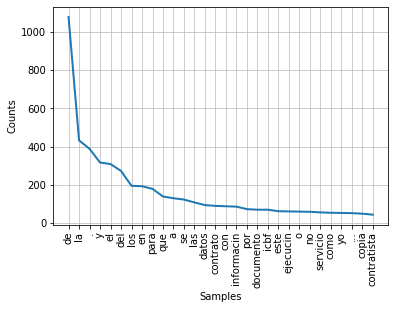

In [ ]:
li_token_lists_flat = [y for x in li_token_lists for y in x]  # flatten the list of token lists to a single list
print("li_token_lists_flat[:10]:", li_token_lists_flat[:10])

di_freq = nltk.FreqDist(li_token_lists_flat)
del di_freq['']
li_freq_sorted = sorted(di_freq.items(), key=lambda x: x[1], reverse=True)  # sorted list
print(li_freq_sorted)
    
di_freq.plot(30, cumulative=False)

## ## Sorted frequency plot for Lemmatized  words after removing stopwords

[('datos', 94), ('contrato', 90), ('informacin', 86), ('documento', 70), ('icbf', 70), ('ejecucin', 61), ('servicio', 56), ('copia', 49), ('contratista', 44), ('gestin', 40), ('implementacin', 39), ('servicios', 38), ('analtica', 36), ('entrega', 36), ('tcnicas', 35), ('bien', 33), ('prestacin', 33), ('proceso', 33), ('condiciones', 32), ('fuentes', 31), ('nivel', 30), ('realizar', 30), ('cualquier', 29), ('ficha', 29), ('medio', 29), ('ambiente', 28), ('fct', 28), ('bienes', 26), ('etapa', 26), ('formato', 26), ('controlada', 25), ('esenciales', 25), ('pruebas', 25), ('adquisicin', 24), ('anlisis', 24), ('considera', 24), ('data', 24), ('f.p.abs', 24), ('impresa', 24), ('imprimir', 24), ('indicadores', 24), ('pgina', 24), ('piense', 24), ('ser', 24), ('versin', 24), ('big', 23), ('trabajo', 22), ('modelo', 21), ('seguridad', 21), ('supervisor', 21), ('plan', 20), ('anexo', 19), ('siguientes', 19), ('cumplimiento', 18), ('procesamiento', 18), ('calidad', 17), ('control', 17), ('entrega

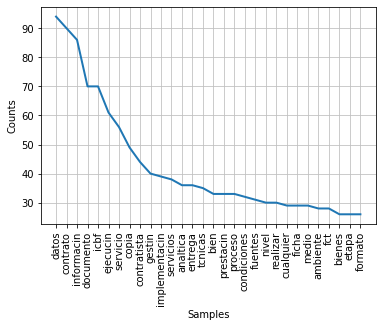

In [ ]:
li_lem_words = df_all_words['lem'].tolist()
di_freq2 = nltk.FreqDist(li_lem_words)
li_freq_sorted2 = sorted(di_freq2.items(), key=lambda x: x[1], reverse=True)  # sorted list
print(li_freq_sorted2)
    
di_freq2.plot(30, cumulative=False)

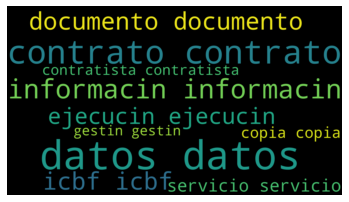

In [ ]:
from wordcloud import WordCloud 
All_Text = " ".join(li_lem_words)
wordcloud = WordCloud(width=3200, height=1800, max_words=10).generate(All_Text) 
  
plt.figure() 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis("off") 
plt.margins(x=0, y=0) 
plt.show() 